

 For today, we'll be working with two datasets: one containing information on earthquakes that occured between 1965 and 2016, and another that contains information on landslides that occured between 2007 and 2016.



In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("Earthquake.csv")
landslides = pd.read_csv("Landslide.csv")


# set seed for reproducibility
np.random.seed(0)

Now we're ready to look at some dates! (If you like, you can take this opportunity to take a look at some of the data.)

# Check the data type of our date column
___

For this part of the challenge, I'll be working with the `date` column from the `landslides` dataframe. The very first thing I'm going to do is take a peek at the first few rows to make sure it actually looks like it contains dates.

In [3]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [4]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Yep, those are dates! But just because I, a human, can tell that these are dates doesn't mean that Python knows that they're dates. Notice that the at the bottom of the output of `head()`, you can see that it says that the data type of this  column is "object".

> Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it.

If you check the pandas dtype documentation [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), you'll notice that there's also a specific `datetime64` dtypes. Because the dtype of our column is `object` rather than `datetime64`, we can tell that Python doesn't know that this column contains dates.

We can also look at just the dtype of your column without printing the first few rows if we like:

In [5]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

In [ ]:
# Your turn! Check the data type of the Date column in the earthquakes dataframe
# (note the capital 'D' in date!)


# Convert our date columns to datetime
___

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it *is* recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

We can pandas what the format of our dates are with a guide called as ["strftime directive", which you can find more information on at this link](http://strftime.org/). The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are [lots of possible parts of a date](http://strftime.org/), but the most common are `%d` for day, `%m` for month, `%y` for a two-digit year and `%Y` for a four digit year.

Some examples:

 * 1/17/07 has the format "%m/%d/%y"
 * 17-1-2007 has the format "%d-%m-%Y"

 Looking back up at the head of the `date` column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates:

In [7]:
landslides.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link'],
      dtype='object')

In [8]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

In [10]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15


Now when I check the first few rows of the new column, I can see that the dtype is `datetime64`. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [9]:
# print the first few rows
landslides['date_parsed'].head()

,date_parsed
0,2007-03-02
1,2007-03-22
2,2007-04-06
3,2007-04-14
4,2007-04-15


Now that our dates are parsed correctly, we can interact with them in useful ways.

___
* **What if I run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

* **Why don't you always use `infer_datetime_format = True?`** There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.
____

In [ ]:
# Your turn! Create a new column, date_parsed, in the earthquakes
# dataset that has correctly parsed dates in it. (Don't forget to
# double-check that the dtype is correct!)


# Select just the day of the month from our column
___

You may be saying at this point, "This messing around with data types is fine, I guess, but what's the *point*?" To answer your question, let's try to get information on the day of the month that a landslide occured on from the original "date" column, which has an "object" dtype:

In [11]:
# try to get the day of the month from the date column
day_of_month_landslides = landslides['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

We got an error! The important part to look at here is the part at the very end that says `AttributeError: Can only use .dt accessor with datetimelike values`. We're getting this error because the dt.day() function doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, because they haven't been parsed we can't interact with them in a useful way.

Luckily, we have a column that we parsed earlier , and that lets us get the day of the month out no problem:

In [14]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day

In [ ]:
# Your turn! get the day of the month from the date_parsed column


# Plot the day of the month to check the date parsing
___

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

/tmp/ipython-input-13696829.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_landslides, kde=False, bins=31)


<Axes: xlabel='date_parsed'>

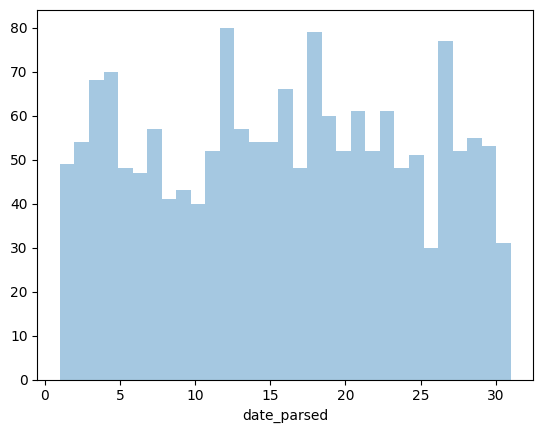

In [15]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

Yep, it looks like we did parse our dates correctly & this graph makes good sense to me. Why don't you take a turn checking the dates you parsed earlier?

In [ ]:
# Your turn! Plot the days of the month from your
# earthquake dataset and make sure they make sense.




You can also look into passing columns that you know have dates in them  the `parse_dates` argument in `read_csv`. (The documention [is here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).) Do note that this method can be very slow, but depending on your needs it may sometimes be handy to use.

For an extra challenge, you can try try parsing the column `Last Known Eruption` from the `volcanos` dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [ ]:
volcanos['Last Known Eruption'].sample(5)